In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#for better viewing
pd.set_option('display.max_columns',None)
df = pd.read_csv('sales.csv')
df.head()


Date Product  Units_Sold  Unit_Price
0  01-10-2025       A          10          50
1  02-10-2025       B          15          40
2  03-10-2025       C           8          60
3  04-10-2025       A          12          50

In [6]:
#check fro missing value
print(df.isnull().sum())

df.fillna(0,inplace=True)#filling missing numbers with 0

df['Date'] = pd.to_datetime(df['Date'])#converting Date to dateime if needed

df.info()#check cokumn types


Date          0
Product       0
Units_Sold    0
Unit_Price    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        4 non-null      datetime64[ns]
 1   Product     4 non-null      object        
 2   Units_Sold  4 non-null      int64         
 3   Unit_Price  4 non-null      int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 260.0+ bytes


In [7]:
df['Total_Sales'] = np.multiply(df['Units_Sold'],df['Unit_Price'])
df.head()

Date Product  Units_Sold  Unit_Price  Total_Sales
0 2025-01-10       A          10          50          500
1 2025-02-10       B          15          40          600
2 2025-03-10       C           8          60          480
3 2025-04-10       A          12          50          600

In [9]:
total_revenue = df['Total_Sales'].sum()
avg_units = df.groupby('Product')['Units_Sold'].mean()
top_product = df.groupby('Product')['Total_Sales'].sum().idxmax()

print(f"Total Revenue:{total_revenue}")
print("\n Average Units Sold Per Product:\n",avg_units)
print(f"\n Top Selling Product:{top_product}")      

Total Revenue:2180

 Average Units Sold Per Product:
 Product
A    11.0
B    15.0
C     8.0
Name: Units_Sold, dtype: float64

 Top Selling Product:A


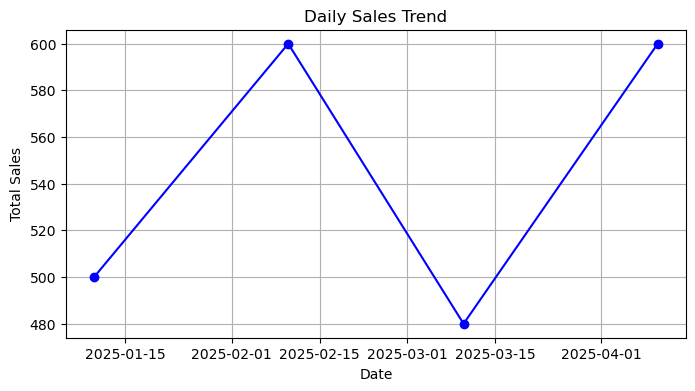

In [11]:
plt.figure(figsize=(8,4))
plt.plot(df['Date'],df['Total_Sales'],marker='o',color='blue')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

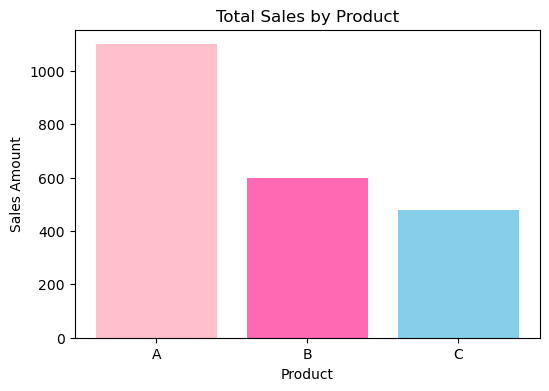

In [20]:
product_sales = df.groupby('Product')['Total_Sales'].sum()

plt.figure(figsize=(6,4))
plt.bar(product_sales.index, product_sales.values,color =['pink','hotpink','skyblue'])
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Sales Amount')
plt.show()